In [15]:
from transformers import AutoModelForCausalLM, AutoTokenizer, AutoConfig
from utils import *


def generate_text(prompt):
    """
    Generates text based on a given prompt using a pretrained BitNet model.

    Args:
        prompt (str): The prompt to generate text from.

    Returns:
        str: The generated text.
    """
    # Load a pretrained BitNet model
    model_path = "/nfs/james/EML/LLaMA-BitNet/model/final_model"
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model = AutoModelForCausalLM.from_pretrained(model_path)
    config = model.num_parameters()
    print('config', config)
    # Huggingface thinks it is a LLamaForCausalLM, so we need to convert it to bitnet.
    # copy_weights=True to pretrained weights get retained when we replace nn.Linear with Bitlinear.
    convert_to_bitnet(model, copy_weights=True)
    model.to(device="cuda:0")

    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    generate_ids = model.generate(inputs.input_ids, max_length=100)
    generated_text = tokenizer.batch_decode(
        generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False
    )[0]

    return generated_text


In [16]:
generate_text("if 1+1=2 then 2+2=")

Some weights of LlamaForCausalLM were not initialized from the model checkpoint at /nfs/james/EML/LLaMA-BitNet/model/final_model and are newly initialized: ['model.layers.0.input_layernorm.weight', 'model.layers.1.input_layernorm.weight', 'model.layers.2.input_layernorm.weight', 'model.layers.3.input_layernorm.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


config 43259392
name 
module LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(32001, 512)
    (layers): ModuleList(
      (0-3): 4 x LlamaDecoderLayer(
        (self_attn): LlamaSdpaAttention(
          (q_proj): Linear(in_features=512, out_features=512, bias=False)
          (k_proj): Linear(in_features=512, out_features=512, bias=False)
          (v_proj): Linear(in_features=512, out_features=512, bias=False)
          (o_proj): Linear(in_features=512, out_features=512, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=512, out_features=1024, bias=False)
          (up_proj): Linear(in_features=512, out_features=1024, bias=False)
          (down_proj): Linear(in_features=1024, out_features=512, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((512,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((512,), eps=1e-05)
      )
   

'if 1+1=2 then 2+2=2 is the best 1+1=2 is the best 1+1=2 is the best 1+1=2 is the best 1+1=2 is the best 1+1=2 is the best 1+1=2 is the best 1+1=2 is the best 1+1=2 is the best 1+1=2 is the best '

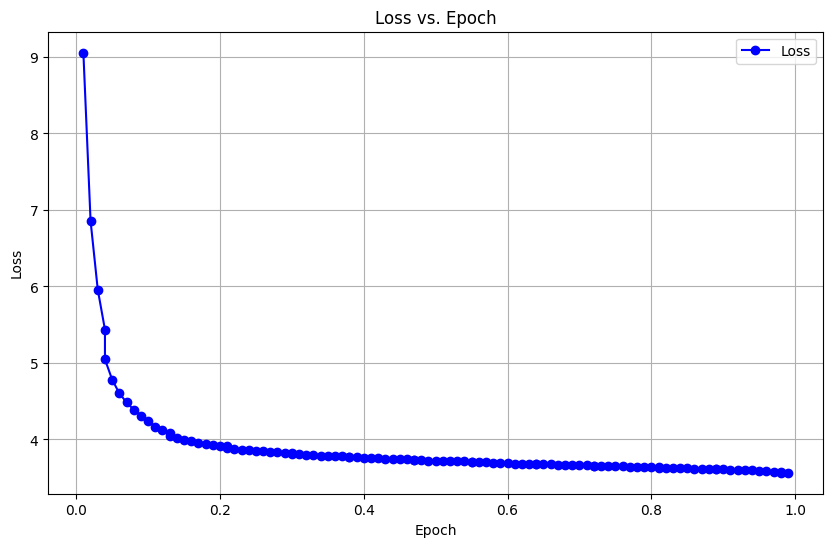

In [8]:
import re
import matplotlib.pyplot as plt

# 假设日志文件路径为 'training.log'
log_file = '/nfs/james/EML/LLaMA-BitNet/wandb/latest-run/files/output.log'

# 用来存储提取的 epoch 和 loss 数据
epochs = []
losses = []

# 打开并读取日志文件
with open(log_file, 'r') as file:
    for line in file:
        # 使用正则表达式从每行中提取 loss 和 epoch
        match = re.search(r"\{'loss': (\d+\.\d+),.*'epoch': (\d+\.\d+)\}", line)
        if match:
            loss = float(match.group(1))
            epoch = float(match.group(2))
            losses.append(loss)
            epochs.append(epoch)

# 绘制 loss 随 epoch 变化的曲线
plt.figure(figsize=(10, 6))
plt.plot(epochs, losses, label='Loss', color='b', marker='o')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


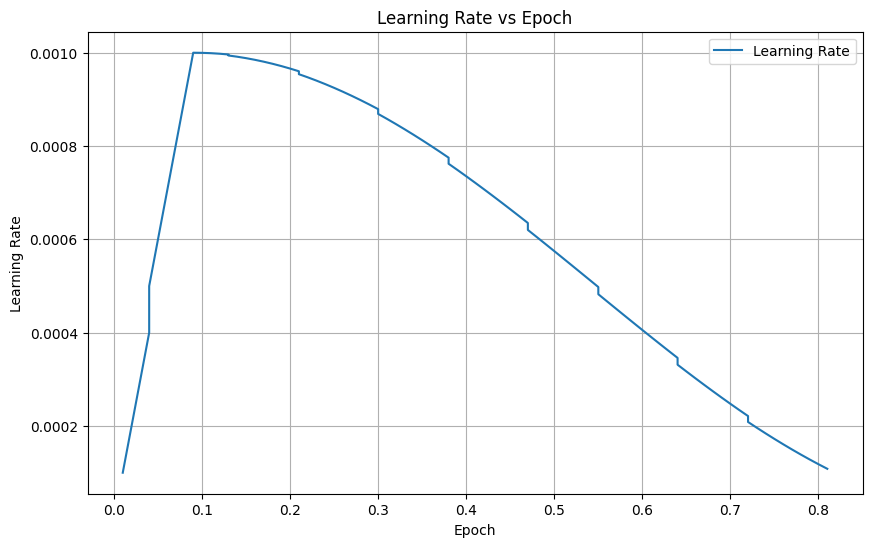

In [10]:
import re
import matplotlib.pyplot as plt

# 假设日志文件路径为 'training.log'
log_file = '/nfs/james/EML/LLaMA-BitNet/wandb/latest-run/files/output.log'

# 用于存储提取的数据
epochs = []
learning_rates = []

# 读取 .log 文件并提取 epoch 和 learning_rate
with open(log_file, 'r') as file:
    for line in file:
        # 使用正则表达式提取 epoch 和 learning_rate
        match = re.search(r"'learning_rate': ([\d\.]+), 'epoch': ([\d\.]+)", line)
        if match:
            learning_rate = float(match.group(1))
            epoch = float(match.group(2))
            
            epochs.append(epoch)
            learning_rates.append(learning_rate)

# 绘制 learning_rate 随着 epoch 变化的曲线
plt.figure(figsize=(10, 6))
plt.plot(epochs, learning_rates, label='Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate vs Epoch')
plt.grid(True)
plt.legend()
plt.show()


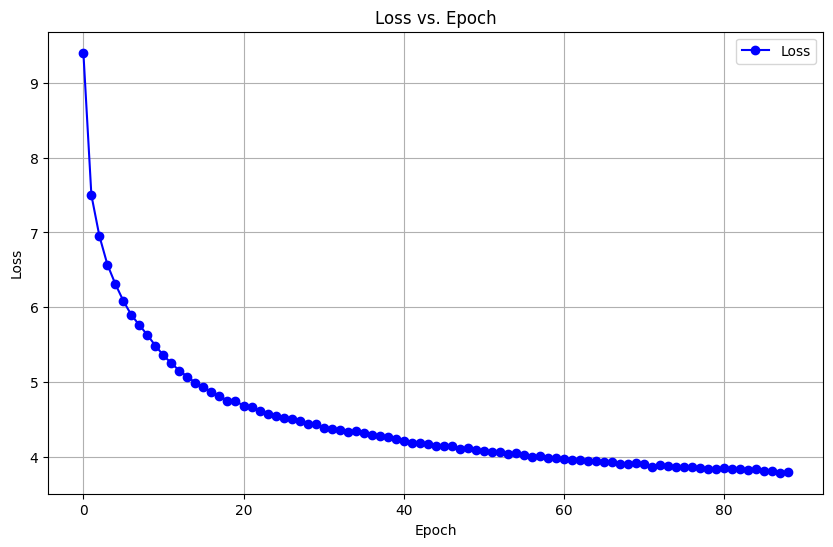

In [25]:
import re
import matplotlib.pyplot as plt

# 假设日志文件路径为 'training.log'
log_file = '/nfs/james/EML/LLaMA-BitNet/wandb/latest-run/files/output.log'

# 用来存储提取的 epoch 和 loss 数据
epochs = []
losses = []

# 打开并读取日志文件
with open(log_file, 'r') as file:
    for line in file:
        # 使用正则表达式从每行中提取 loss 和 epoch
        match = re.search(r"\{'loss': (\d+\.\d+),.*'epoch': (\d+\.\d+)\}", line)
        if match:
            loss = float(match.group(1))
            epoch = float(match.group(2))
            losses.append(loss)
            epochs.append(epoch)

# 绘制 loss 随 epoch 变化的曲线
plt.figure(figsize=(10, 6))
plt.plot( losses, label='Loss', color='b', marker='o')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


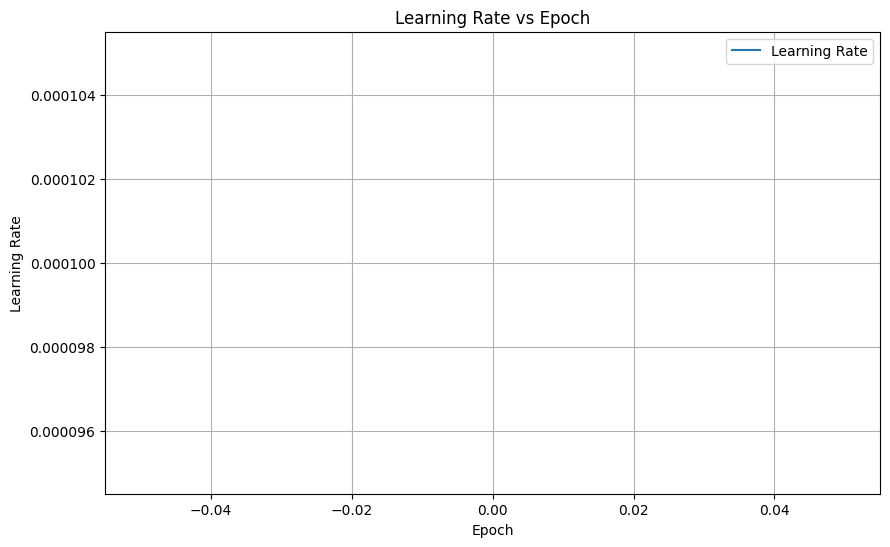

In [19]:
import re
import matplotlib.pyplot as plt

# 假设日志文件路径为 'training.log'
log_file = '/nfs/james/EML/LLaMA-BitNet/wandb/latest-run/files/output.log'

# 用于存储提取的数据
epochs = []
learning_rates = []

# 读取 .log 文件并提取 epoch 和 learning_rate
with open(log_file, 'r') as file:
    for line in file:
        # 使用正则表达式提取 epoch 和 learning_rate
        match = re.search(r"'learning_rate': ([\d\.]+), 'epoch': ([\d\.]+)", line)
        if match:
            learning_rate = float(match.group(1))
            epoch = float(match.group(2))
            
            epochs.append(epoch)
            learning_rates.append(learning_rate)

# 绘制 learning_rate 随着 epoch 变化的曲线
plt.figure(figsize=(10, 6))
plt.plot( learning_rates, label='Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate vs Epoch')
plt.grid(True)
plt.legend()
plt.show()
